# Computing Fixed Points for the Solow Model

In this notebook we consider an easy, one-dimensional fixed point problem where we know the solution.

Then we compute it by both successive approximation and Newton's method.

The objective is to practice Python coding and investigate these algorithms.

We recall that, to find the fixed point of scalar function $g$, Newton's method iterates on

$$ 
    x_{t+1} = \frac{g(x_t) - g'(x_t) x_t}{ 1 - g'(x_t) },
    \qquad x_0 \text{ given }.
$$


We use the following imports.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

## The Solow Model

Assuming Cobb-Douglas production technology, the law of motion for capital is

$$ k_{t+1} = sAk_t^\alpha + (1-\delta) k_t $$

We store the parameters in a `namedtuple`

In [58]:
SolowParameters = namedtuple("SolowParameters", ('A', 's', 'α', 'δ'))

This function creates a `namedtuple` of the right type and has default parameter values.

In [59]:
def create_solow_params(A=2.0, s=0.3, α=0.3, δ=0.4):
    "Creates a Solow model parameterization with default values."
    return SolowParameters(A=A, s=s, α=α, δ=δ)

The next two functions describe the law of motion and the true fixed point $k^*$.

In [73]:
def g(k, params):
    A, s, α, δ = params
    return A * s * k**α + (1 - δ) * k
    
def exact_fixed_point(params):
    A, s, α, δ = params
    return ((s * A) / δ)**(1/(1 - α))


Here is a function to provide a 45 degree plot of the dynamics.

In [74]:
def plot_45(params, ax, fontsize=18):
    
    k_min, k_max = 0, 3
    k_grid = np.linspace(k_min, k_max, 1200)

    # Plot the functions
    lb = r"$g(k) = sAk^{\alpha} + (1 - \delta)k$"
    ax.plot(k_grid, g(k_grid, params),  lw=2, alpha=0.6, label=lb)
    ax.plot(k_grid, k_grid, "k--", lw=1, alpha=0.7, label="45")

    # Show and annotate the fixed point
    kstar = exact_fixed_point(params)
    fps = (kstar,)
    ax.plot(fps, fps, "go", ms=10, alpha=0.6)
    ax.annotate(r"$k^* = (sA / \delta)^{\frac{1}{1-\alpha}}$", 
             xy=(kstar, kstar),
             xycoords="data",
             xytext=(20, -20),
             textcoords="offset points",
             fontsize=fontsize)

    ax.legend(loc="upper left", frameon=False, fontsize=fontsize)

    ax.set_yticks((0, 1, 2, 3))
    ax.set_yticklabels((0, 1, 2, 3), fontsize=fontsize)
    ax.set_ylim(0, 3)
    ax.set_xlabel("$k_t$", fontsize=fontsize)
    ax.set_ylabel("$k_{t+1}$", fontsize=fontsize)

Let's look at the 45 degree diagram for one or two parameterizations.

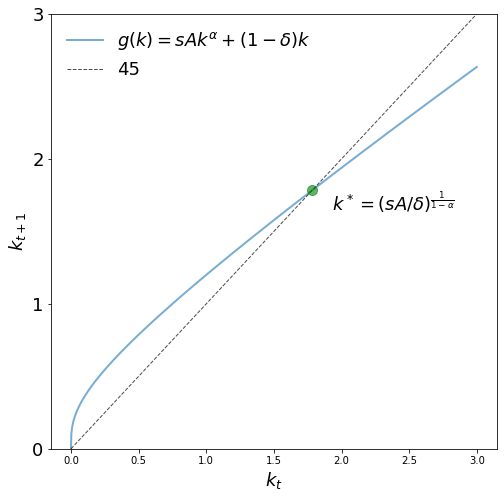

In [75]:
params = create_solow_params()
fig, ax = plt.subplots(figsize=(8, 8))
plot_45(params, ax)
plt.show()

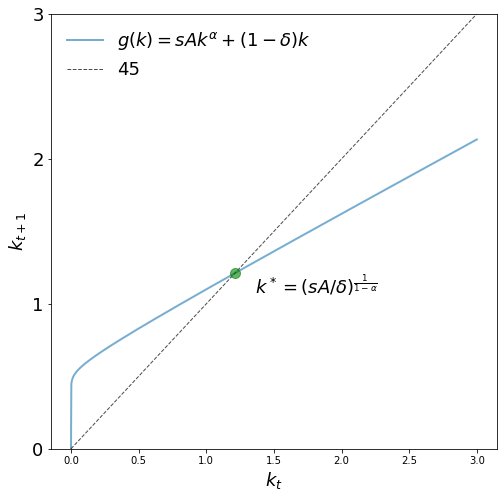

In [76]:
params = create_solow_params(α=0.05, δ=0.5)
fig, ax = plt.subplots(figsize=(8, 8))
plot_45(params, ax)
plt.show()

Here's a time series from a particular choice of $k_0$.

In [87]:
def compute_iterates(k_0, f, params, n=25):
    "Compute time series of length n generated by arbitrary function f."
    k = k_0
    k_iterates = []
    for t in range(n):
        k_iterates.append(k)
        k = f(k, params)
    return k_iterates

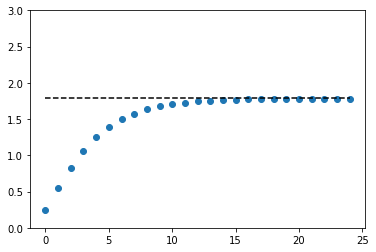

In [90]:
params = create_solow_params()
k_0 = 0.25
k_series = compute_iterates(k_0, g, params)
k_star = exact_fixed_point(params)

fig, ax = plt.subplots()
ax.plot(k_series, 'o')
ax.plot([k_star] * len(k_series), 'k--')
ax.set_ylim(0, 3)
plt.show()

Since we are iterating on $g$, we are also implemening successive approximation.

In [95]:
k_series = compute_iterates(k_0, g, params, n=10_000)
k_star_approx = k_series[-1]
k_star_approx

1.7846741842265788

In [96]:
k_star

1.7846741842265788

## Newton's Method: Exercise

Implement Newton's method and plot the sequence of iterates (i.e., "guesses").

Plot them for different starting points (choices of $k_0$) and plot the sequence generated by successive approximation too, as well as the fixed point $k^*$ (similar to the figure above).

Investigate whether or not the Newton iterates converge faster.

Do not worry about writing fast code for now.

In [116]:
for _ in range(10):
    print("solution below.")

solution below.
solution below.
solution below.
solution below.
solution below.
solution below.
solution below.
solution below.
solution below.
solution below.


To implement Newton's method we observe that

$$ g'(k) = \alpha s A k^{1-\alpha} + (1-\delta) $$

In [117]:
def Dg(k, params):
    A, s, α, δ = params
    return α * A * s * k**(α-1) + (1 - δ)

Here's a function $q$ such that iterating with $q$ is equivalent to Newton's method.

In [118]:
def q(k, params):
    return (g(k, params) - Dg(k, params) * k) / (1 - Dg(k, params))

Now let's plot some trajectories.

In [129]:
def plot_trajectories(params, 
                      k0_a=0.8,  # first initial condition
                      k0_b=3.1,  # second initial condition
                      n=20):     # length of time series

    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    ax1, ax2 = axes

    ks1 = compute_iterates(k0_a, g, params, n)
    ax1.plot(ks1, "-o", label="successive approximation")

    ks2 = compute_iterates(k0_b, g, params, n)
    ax2.plot(ks2, "-o", label="successive approximation")

    ks3 = compute_iterates(k0_a, q, params, n)
    ax1.plot(ks3, "-o", label="newton steps")

    ks4 = compute_iterates(k0_b, q, params, n)
    ax2.plot(ks4, "-o", label="newton steps")

    for ax in axes:
        ax.plot(kstar * np.ones(n), "k--")
        ax.legend(fontsize=fs, frameon=False)
        ax.set_ylim(0.6, 3.2)
        ax.set_yticks((kstar,))
        ax.set_yticklabels(("$k^*$",), fontsize=fs)
        
    plt.show()


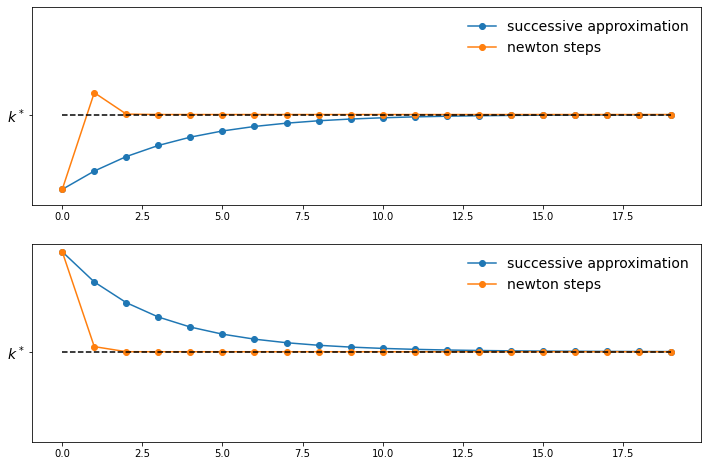

In [130]:
params = create_solow_params()
plot_trajectories(params)